## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [1]:
import numpy as np
import pandas as pd

#### What is the most expensive home in the dataset? (★☆☆)

In [2]:
df_datos=pd.read_csv("assets/real_estate.csv",sep=";",index_col=0)
display(df_datos.head())
columna = df_datos['price']
max_price = columna.max()
max_index = columna.idxmax()
#print(dato_max)
#print(indice)
print(f'La propiedad mas cara es {max_index} con un precio de {max_price}')

,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN


La propiedad mas cara es 13111 con un precio de 8500000


#### What is cheapest home in the dataset? (★☆☆)

In [3]:
# Ahora trato de calcular la propiedad mas barata
# Para eso saco los datos de la propiedad que valen 0
df_mayor_cero=df_datos[df_datos['price']>0.0]
columna = df_mayor_cero['price']
min_price = columna.min()
min_index = columna.idxmin()
#print(dato_max)
#print(indice)
print(f'La propiedad mas barata es {min_index} con un precio de {min_price}')


La propiedad mas barata es 7492 con un precio de 600


In [4]:
# Haciendo con describe
df_mayor_cero['price'].describe()

count    1.527500e+04
mean     4.791784e+05
std      5.916957e+05
min      6.000000e+02
25%      1.699000e+05
50%      2.820480e+05
75%      5.400000e+05
max      8.500000e+06
Name: price, dtype: float64

#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [5]:
dato_max=df_datos['surface'].max()
indice = df_datos['surface'].idxmax()
#print(dato_max)
#print(indice)
print(f'La propiedad mas grande es {indice} con un tamaño de {dato_max}')
# Ahora trato de calcular la propiedad mas pequeña

dato_min=df_datos['surface'].min()
indice_min = df_datos['surface'].idxmin()


print(f'La propiedad mas pequeña es {indice_min} con un tamaño de {dato_min}')

La propiedad mas grande es 6795 con un tamaño de 249000.0
La propiedad mas pequeña es 499 con un tamaño de 15.0


#### How many populations (level5) the dataset contains? (★☆☆)

In [6]:
# Son cuantos son los unicos datos en esa muestra
print(df_datos['level5'].unique().size)

168


#### Does the dataset contain NAs? (★☆☆)


In [7]:
df_datos.isnull().values.any()

True

#### Delete the NAs of the dataset, if applicable (★★☆)

In [ ]:
# No es posible borrar todos los NAs ya que borraria todos los datos del data set



#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [8]:
#df_datos['level5'].unique()
filter_df= df_datos[df_datos['level5']=='Arroyomolinos (Madrid)']
print("El valor promedio solicitado es",filter_df['price'].mean())



El valor promedio solicitado es 294541.59854014596


#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

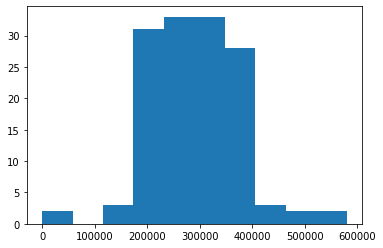

In [9]:
import matplotlib.pyplot as plt 
plt.hist(filter_df['price'])
plt.show()

#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

In [17]:
filter_southBelt= df_datos[df_datos['level5'].isin(("Fuenlabrada","Leganés","Getafe","Alcorcón"))]
filter_southBelt= filter_southBelt[filter_southBelt['price']>0]
print("El filtro aplicado queda",filter_southBelt)

El filtro aplicado queda        id_realEstates  isNew                            realEstate_name  \
2           153867863  False          tecnocasa fuenlabrada ferrocarril   
4           152776331  False          tecnocasa fuenlabrada ferrocarril   
86          153152077  False                    sinergical inmobiliaria   
95          153995577  False                            viviendas365com   
110         153586414  False            area uno asesores inmobiliarios   
...               ...    ...                                        ...   
15276       153903887  False  aliseda servicios de gestion inmobiliaria   
15292       151697757  False                                    unipiso   
15306       153902389  False                             jadein ferrero   
15323       153871864  False                          gestion comercial   
15326       153901467  False                              montehogar 68   

       phone_realEstate                                       url_inmueble

#### Make a bar plot of the median of prices (★★★) 

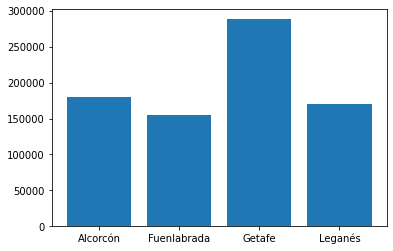

In [18]:

agrupando = filter_southBelt.groupby('level5').median()
keys = agrupando.index.values.tolist()
values = agrupando['price'].tolist()
plt.bar(keys, values)
plt.show()

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

In [20]:
columns = ["price", "rooms", "surface", "bathrooms"]

for column in columns:
    mean = filter_southBelt[column].mean()
    print("El promedio de la variable", column, "es:", mean)
    variance = filter_southBelt[column].var()
    print("La varianza de la variable", column, "es:", variance)

El promedio de la variable price es: 226085.69162011173
La varianza de la variable price es: 14444627877.728062
El promedio de la variable rooms es: 3.0235955056179775
La varianza de la variable rooms es: 0.7204774964927139
El promedio de la variable surface es: 111.29806451612903
La varianza de la variable surface es: 4275.920086688338
El promedio de la variable bathrooms es: 1.6271186440677967
La varianza de la variable bathrooms es: 0.5757343354551729


#### What is the most expensive home of each population? (★★☆) 

In [22]:

ds_precio_descendente = filter_southBelt.sort_values(by='price', ascending=False)
ds_precio_descendente[0:1]
nombres_5 =["Fuenlabrada","Leganés","Getafe","Alcorcón"]
for population in nombres_5:
    ds_mehfp = ds_precio_descendente[ds_precio_descendente["level5"] == population]
    print("La casa más costosa en", population, "es:")
    display(ds_mehfp[0:1])

La casa más costosa en Fuenlabrada es:


,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
11562,153660921,False,unna madrid,912780846.0,https://www.fotocasa.es/es/comprar/vivienda/va...,4.0,3.0,274.0,490000,2019-12-20T10:31:00Z,...,0,0,0,0,0,1,"40,28286","-3,81475",NaN,NaN


La casa más costosa en Leganés es:


,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
10413,152251506,False,bafre gestion y servicios inmobiliarios,910752245.0,https://www.fotocasa.es/es/comprar/vivienda/co...,6.0,5.0,360.0,650000,2019-12-21T16:00:00Z,...,0,0,0,0,0,0,"40,3423636291504","-3,74814414978027",NaN,NaN


La casa más costosa en Getafe es:


,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
2882,151105544,False,unna grupo inmobiliario,912665694.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,6.0,4.0,600.0,1050000,2019-12-27T15:59:00Z,...,0,0,0,0,0,0,"40,302820239187","-3,7281704612835",NaN,NaN


La casa más costosa en Alcorcón es:


,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
5586,153275915,False,100 home red inmobiliaria,912669623.0,https://www.fotocasa.es/es/comprar/vivienda/ca...,6.0,6.0,722.0,950000,2019-12-26T11:01:00Z,...,0,0,0,0,0,0,"40,3535169","-3,8664683",NaN,NaN


#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

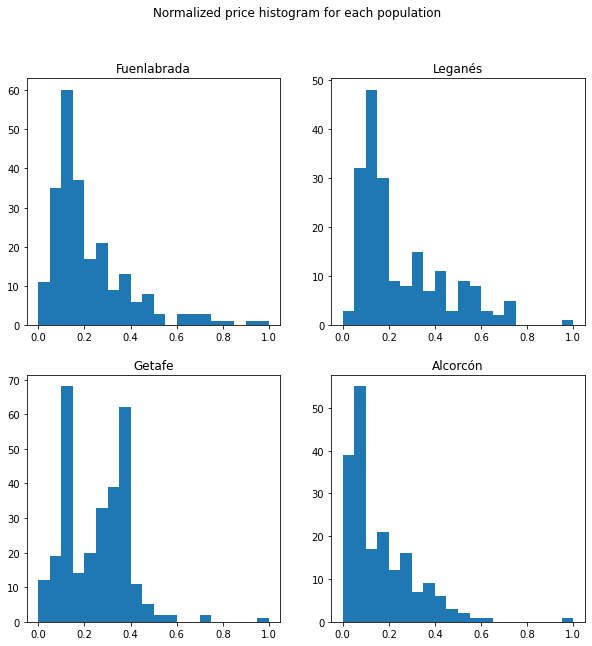

In [23]:
plt.figure(figsize=(10,10))
plt.suptitle("Normalized price histogram for each population")
id = 1
columna = "price"

for population in nombres_5:
    subset_population = df_datos[df_datos["level5"] == population]
    subset_population_normalizado = subset_population.copy()
    maximo = subset_population[columna].max()
    minimo = subset_population[columna].min()
    subset_population_normalizado[columna] = (subset_population[columna] - minimo) / (maximo - minimo)
    plt.subplot(2, 2, id)
    plt.hist(subset_population_normalizado["price"], bins=20)
    plt.title(population)
    id = id+1

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [ ]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

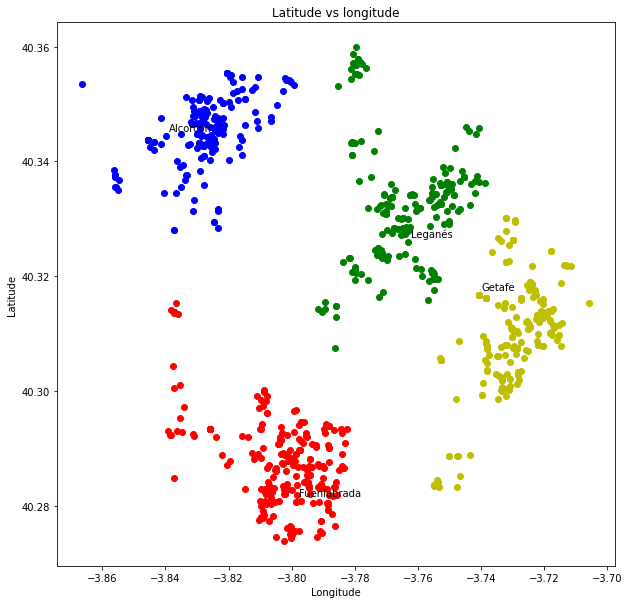

In [25]:
plt.figure(figsize=(10,10))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Latitude vs longitude")

colores = ["r", "g", "y", "b"]

for j in range(4):
    south_belt = df_datos[df_datos["level5"] == (nombres_5[j])]
    cantidad_filas = south_belt.shape[0]
    for k in range(cantidad_filas):
        latitud = south_belt.iloc[k]["latitude"]
        latitud = str(latitud)  # Es necesario convertir la latitud y la longitud a floats
        latitud_float = float(latitud.replace("," , "."))
        longitud = south_belt.iloc[k]["longitude"]
        longitud = str(longitud)
        longitud_float = float(longitud.replace("," , "."))
        texto = "o"+colores[j]
        if latitud_float > 30:  # Agrego esta condición ya que una de las filas tiene latitud y longitud 0
            plt.plot(longitud_float, latitud_float, texto)
        if k == cantidad_filas-1 :
            plt.text(longitud_float+0.001, latitud_float+0.001, nombres_5[j])

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:


#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

In [26]:
def calculo_metros(lista):
    for population in lista:
        subset_population = df_datos[df_datos["level5"] == population] 
        promedio = (subset_population["price"] / subset_population["surface"]).mean()
        print("El precio promedio por metro cuadrado en", population, "es", promedio)

        

In [27]:
calculo_metros(["Getafe", "Alcorcón"])

El precio promedio por metro cuadrado en Getafe es 2066.314949251463
El precio promedio por metro cuadrado en Alcorcón es 2239.302480199618


#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

In [28]:

for population in ["Valdemorillo", "Galapagar"]:
    subset_price_average = df_datos[df_datos["level5"]==population]
    average = subset_price_average["price"].mean()
    print("El precio promedio en", population, "es:", average)

El precio promedio en Valdemorillo es: 363860.2931034483
El precio promedio en Galapagar es: 360063.20238095237


#### What happens if we do the same analysis for price/m2 (★★☆) 

In [29]:
calculo_metros(["Valdemorillo", "Galapagar"])

El precio promedio por metro cuadrado en Valdemorillo es 1317.9502109024986
El precio promedio por metro cuadrado en Galapagar es 1606.3240303094024


#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

Text(0.5, 1.0, 'Surface vs price')

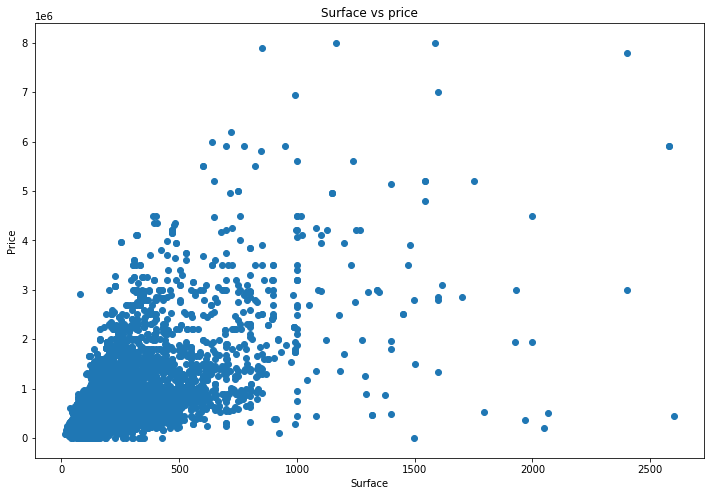

In [31]:
# Interpreto que en este caso pide usar el dataset completo
# Establezco un valor máximo para la superficie ya que hay valores que se salen de lo normal
ds_filtrado_por_superficie = df_datos[df_datos["surface"]<3000]
plt.figure(figsize=(12,8))
plt.scatter(ds_filtrado_por_superficie["surface"], ds_filtrado_por_superficie["price"])
plt.xlabel("Surface")
plt.ylabel("Price")
plt.title("Surface vs price")

In [ ]:
# dejar comentario porque es esta forma de la dispersion de precios
# Podemos decir que la gran mayoria de datos estan concentrados en un rango, pero los que 
# estan separados vemos que cuanto mas es el area o superfice que ocupan es mayor el precio


#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

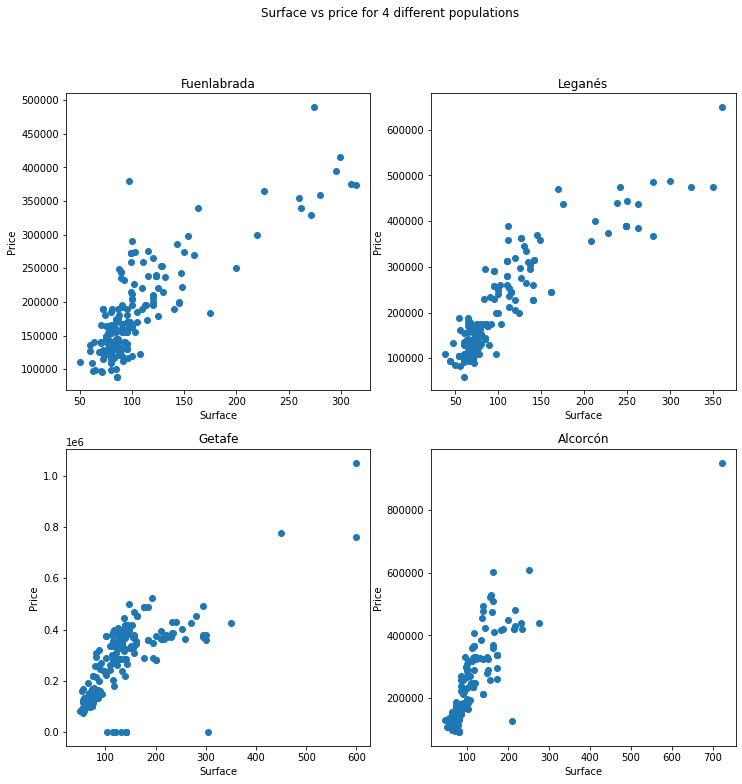

In [34]:
plt.figure(figsize=(12,12))
plt.suptitle("Surface vs price for 4 different populations")
id = 1

for population in nombres_5:
    subset_population = df_datos[df_datos["level5"] == population]
    plt.subplot(2, 2, id)
    plt.scatter(subset_population["surface"], subset_population["price"])
    plt.xlabel("Surface")
    plt.ylabel("Price")
    plt.title(population)
    id = id+1

#### How many  real estate agencies the dataset contains? (★★☆) 

In [35]:
grupo_real_estate_agencies = df_datos.groupby('realEstate_name').sum()
print("Hemos encontrado", len(grupo_real_estate_agencies), "agencias en el dataset")

Hemos encontrado 1821 agencias en el dataset


#### What is the population (level 5) that contains the most houses? (★★☆) 

In [36]:
# Aca utilizamos un diccionario para hacer el grupoby

most_houses_population = df_datos.groupby('level5')['id_realEstates'].count()
max_houses = most_houses_population.max()

most_houses_population_dict = most_houses_population.to_dict()

population_MH = []
for key, value in most_houses_population_dict.items():
    if value == max_houses:
        population_MH.append(key)

print(population_MH)

[' Madrid Capital']
